# Now an exploration with Gaussian bumps

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Plot inline
%matplotlib inline

# Add the proper path
import sys
sys.path.append("../")

# Local libraries
from signals.aux_functions import gaussian_bump, combine_gaussian_bumps
from inputs.sensors import Sensor, PerceptualSpace
from inputs.lag_structure import LagStructure

# Widgets library
from ipywidgets import interact

In [20]:
Tmax = 1000
dt = 1.0
time = np.arange(0, Tmax, dt)


In [22]:
# First we define the parameters 
max_rate = 100
base = 10
value = 30
attenuation = 2

center1 = 250
distance = 300
center2 = center1 + distance

**Now we define the gaussians bumps and combine them**

In [36]:
# Create the gaussian bumpbs
gb1 = gaussian_bump(time, center1, max_rate, base, value, attenuation)
gb2 = gaussian_bump(time, center2, max_rate, base, value, attenuation)

# Add some noise
gb1 += np.random.rand(gb1.size)
gb2 += np.random.rand(gb2.size)

#### Now we plot them

(0, 120)

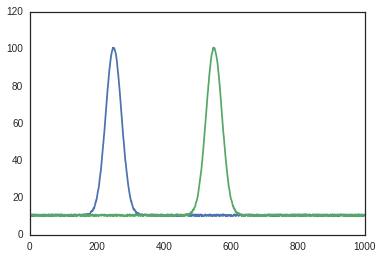

In [37]:
plt.plot(time, gb1)
plt.plot(time, gb2)
plt.ylim([0, max_rate + 20])

### Nexa Machinery

In [38]:
# Input structure
from signals.aux_functions import bump
from inputs.sensors import Sensor, PerceptualSpace
from inputs.lag_structure import LagStructure

# Nexa
from nexa.nexa import Nexa

#### Perceptual space

In [39]:
lag_times = np.linspace(0, 600, 4) # Go two times the period
window_size = distance
Nwindowsize = int(window_size / dt) 
weights = None
lag_structure = LagStructure(lag_times=lag_times, weights=weights, window_size=window_size)
sensor1 = Sensor(gb1, dt, lag_structure)
sensor2 = Sensor(gb2, dt, lag_structure)
sensors = [sensor1, sensor2]
perceptual_space = PerceptualSpace(sensors, lag_first=True)

#### Now we start Nexa

In [40]:
Nspatial_clusters = 2  # Number of spatial clusters
Ntime_clusters = 4  # Number of time clusters
Nembedding = 2  # Dimension of the embedding space

# Now the Nexa object
nexa_object = Nexa(perceptual_space, Nspatial_clusters,
                   Ntime_clusters, Nembedding)

### Visualizations

In [41]:
# Visualization libraries
from visualization.sensor_clustering import visualize_cluster_matrix
from visualization.sensors import visualize_SLM
from visualization.sensors import visualize_STDM_seaborn

#### Visualize SLM

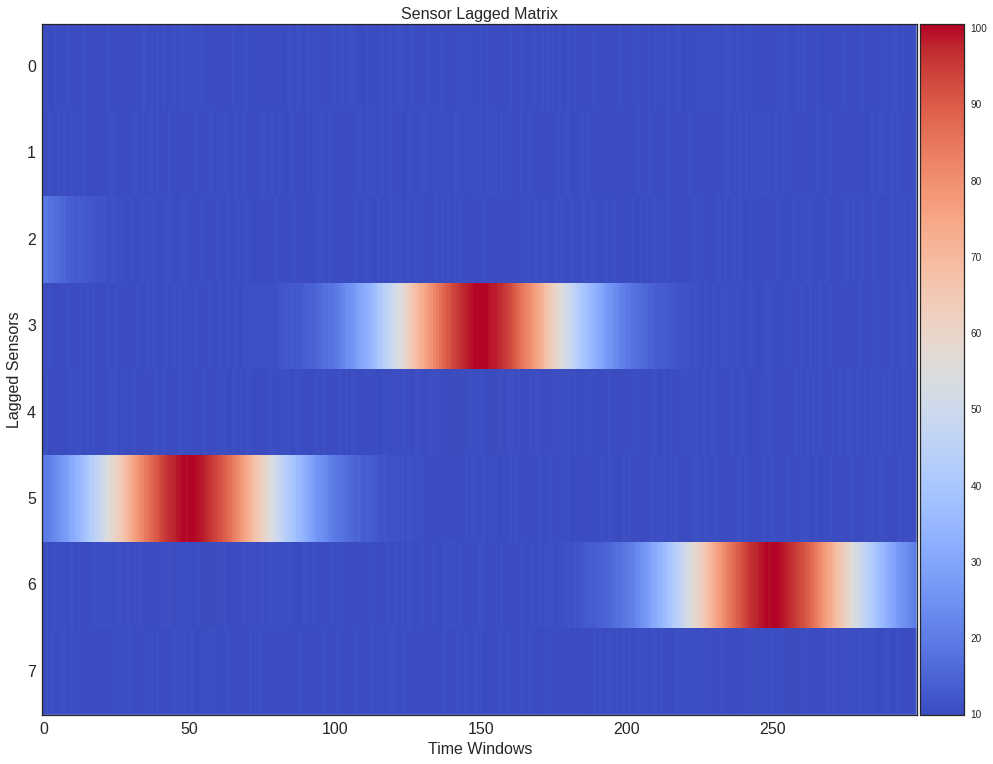

In [42]:
fig = visualize_SLM(nexa_object)
plt.show(fig)

#### Spatio Temporal Distance Matrix

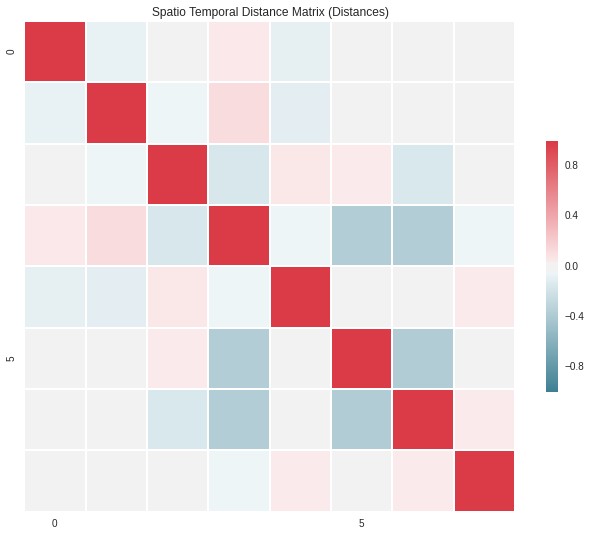

In [43]:
nexa_object.calculate_distance_matrix()
fig = visualize_STDM_seaborn(nexa_object)
plt.show(fig)

#### Embedding in two dimensions

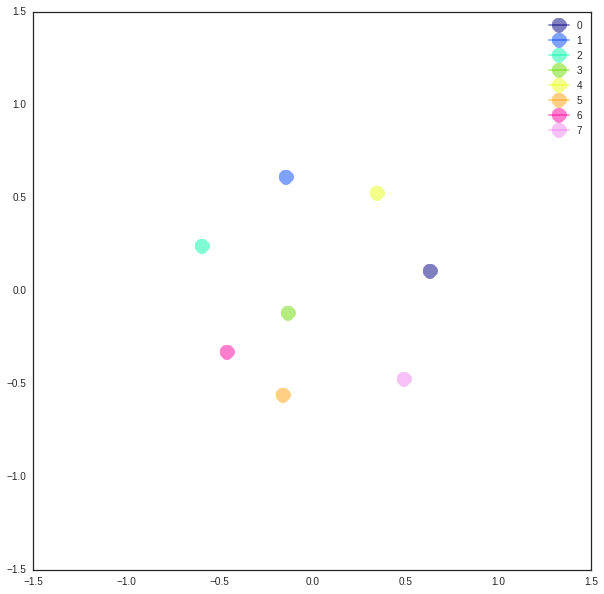

In [44]:
nexa_object.Nembedding = 2
nexa_object.calculate_embedding()
embed = nexa_object.embedding

# Set the color map
colormap = plt.cm.gist_ncar
plt.gca().set_color_cycle([colormap(i) for i in np.linspace(0, 0.9, embed.shape[0])])
    

for i in range(embed.shape[0]):
    plt.plot(embed[i, 0], embed[i, 1], label=str(i), marker='o',
             markersize=15, alpha=0.5)
    plt.hold(True)

plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])    
plt.legend()

# Change the size
figure = plt.gcf()
figure.set_size_inches(10, 10)

#### Sensor Clustering

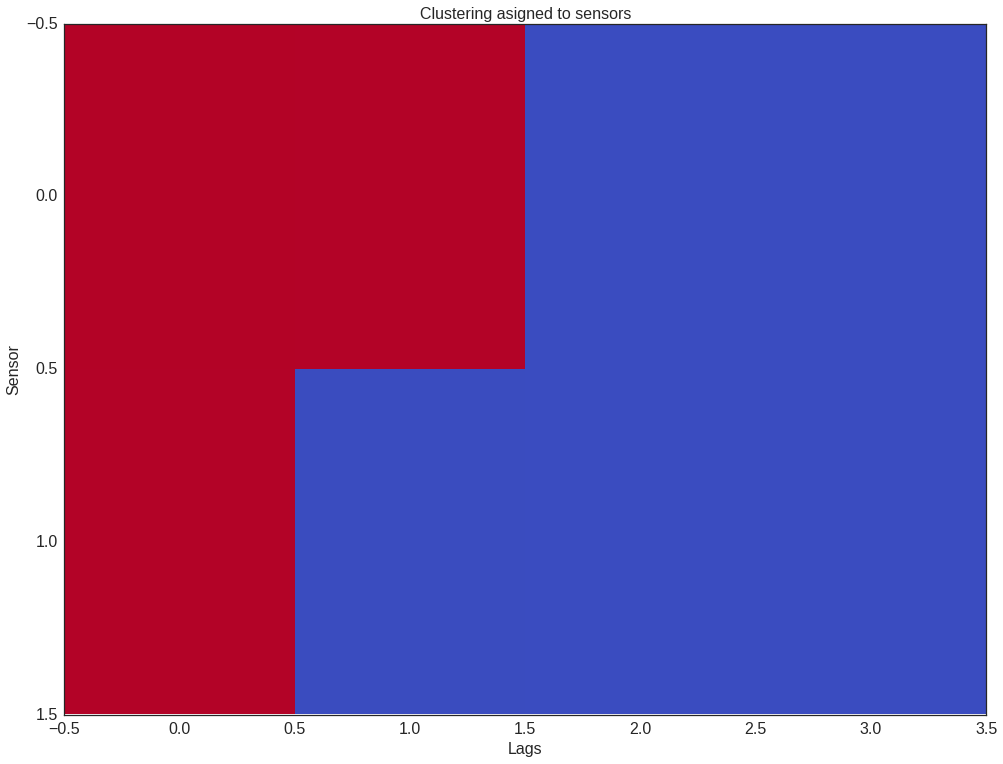

In [45]:
nexa_object.Nspatial_clusters = 2
nexa_object.calculate_spatial_clustering(centers=True)
fig = visualize_cluster_matrix(nexa_object)

#### Embedding

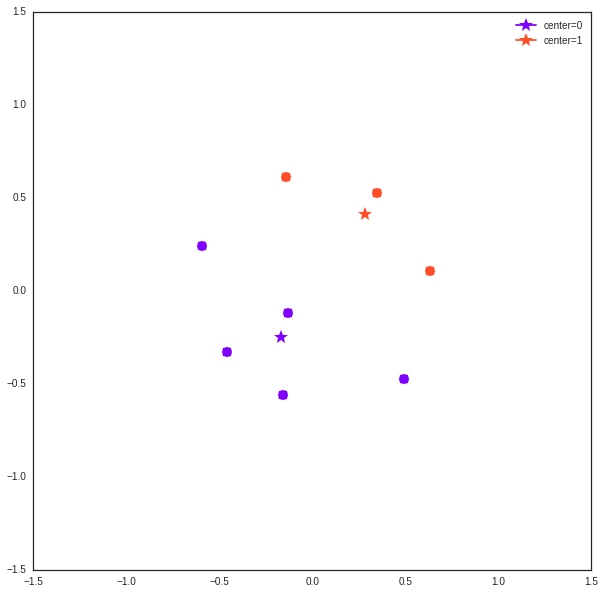

In [46]:
# Calculate centers and transformation from centers to indexes
centers = nexa_object.spatial_cluster_centers
index_to_cluster = nexa_object.index_to_cluster
nexa_object.calculate_cluster_to_indexes()
cluster_to_index = nexa_object.cluster_to_index

# Plot the centers
colormap = plt.cm.rainbow
colors = [colormap(i) for i in np.linspace(0, 0.9, centers[0].size)]

for index, pair in enumerate(zip(centers, colors)):
    center = pair[0]
    color = pair[1]
    # First we plot the center
    plt.plot(center[0], center[1], label='center='+str(index),
                markersize=15, marker='*', color=color)
    # Now all the points to that center
    indexes = cluster_to_index[index]
    for point in indexes:
        plt.plot(embed[point, 0], embed[point, 1], 'o',
                 markersize=10, color=color)

plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
plt.legend()

# Change the size
figure = plt.gcf()
figure.set_size_inches(10, 10)

# Parameter Study

#### SLM and Plots

In [65]:
def visualize_slm(mu1, dist, Max, base, value):
    # Create the gaussian bumpbs
    gb1 = gaussian_bump(time, mu1, Max, base, value, attenuation)
    gb2 = gaussian_bump(time, mu1 + dist, Max, base, value, attenuation)

    # Add some noise
    gb1 += np.random.rand(gb1.size)
    gb2 += np.random.rand(gb2.size)
    
    lag_times = np.linspace(0, 600, 4) # Go two times the period
    window_size = dist
    Nwindowsize = int(window_size / dt) 
    weights = None
    lag_structure = LagStructure(lag_times=lag_times, weights=weights, window_size=window_size)
    sensor1 = Sensor(gb1, dt, lag_structure)
    sensor2 = Sensor(gb2, dt, lag_structure)
    sensors = [sensor1, sensor2]
    perceptual_space = PerceptualSpace(sensors, lag_first=True)
    
    # Nexa
    nexa_object = Nexa(perceptual_space, Nspatial_clusters,
                   Ntime_clusters, Nembedding)
    
        

    plt.plot(time, gb1)
    plt.plot(time, gb2)
    plt.ylim([0, max_rate + 100])
    
    # Visualize SLM
    fig = visualize_SLM(nexa_object)
    plt.show(fig)

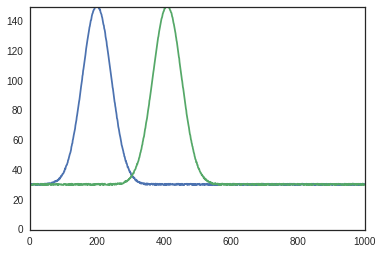

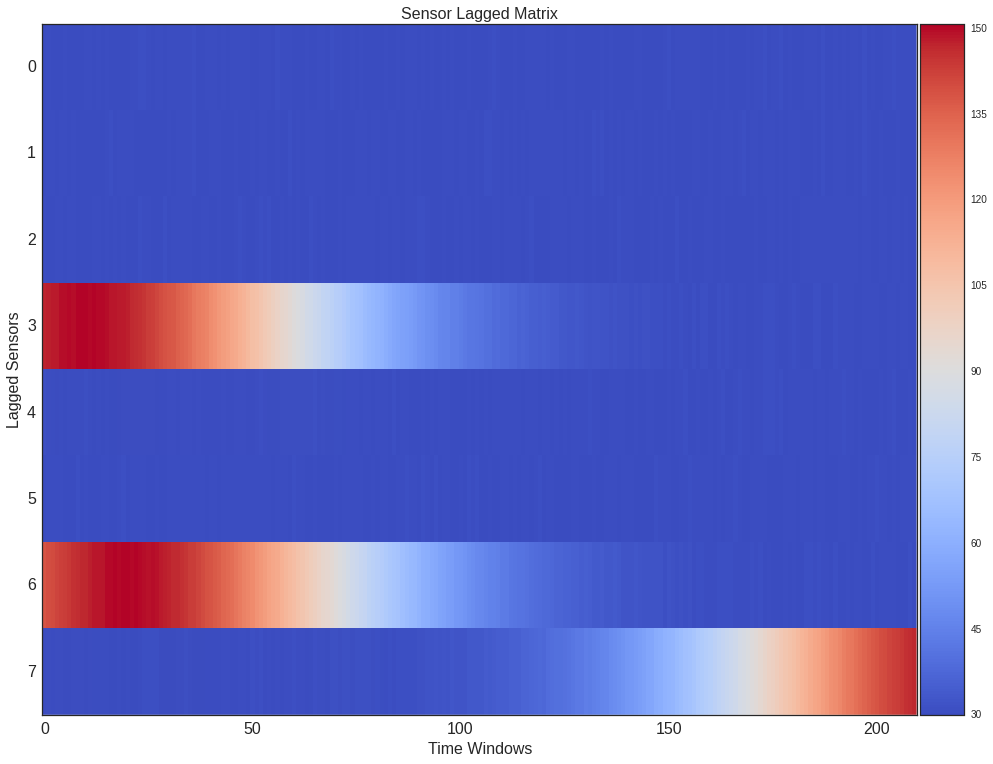

<function __main__.visualize_slm>

In [66]:
interact(visualize_slm, mu1=(100, 300), dist=(20, 400), Max=(100, 200),
         base=(20, 40), value=(20, 100))

#### Sensor Clustering

In [75]:
def visualize_clustering(mu1, dist, Max, base, value, clusters):
    # Create the gaussian bumpbs
    gb1 = gaussian_bump(time, mu1, Max, base, value, attenuation)
    gb2 = gaussian_bump(time, mu1 + dist, Max, base, value, attenuation)

    # Add some noise
    gb1 += np.random.rand(gb1.size)
    gb2 += np.random.rand(gb2.size)
    
    lag_times = np.linspace(0, 600, 4) # Go two times the period
    window_size = dist
    Nwindowsize = int(window_size / dt) 
    weights = None
    lag_structure = LagStructure(lag_times=lag_times, weights=weights, window_size=window_size)
    sensor1 = Sensor(gb1, dt, lag_structure)
    sensor2 = Sensor(gb2, dt, lag_structure)
    sensors = [sensor1, sensor2]
    perceptual_space = PerceptualSpace(sensors, lag_first=True)
    
    # Nexa
    nexa_object = Nexa(perceptual_space, Nspatial_clusters,
                   Ntime_clusters, Nembedding)
 
    nexa_object.calculate_distance_matrix()
        
    nexa_object.Nembedding = 2
    nexa_object.calculate_embedding()
    embed = nexa_object.embedding

    # Set the color map
    colormap = plt.cm.gist_ncar
    plt.gca().set_color_cycle([colormap(i) for i in np.linspace(0, 0.9, embed.shape[0])])


    for i in range(embed.shape[0]):
        plt.plot(embed[i, 0], embed[i, 1], label=str(i), marker='o',
                 markersize=15, alpha=0.5)
        plt.hold(True)

    plt.xlim([-1.5, 1.5])
    plt.ylim([-1.5, 1.5])    
    plt.legend()

    # Change the size
    figure = plt.gcf()
    figure.set_size_inches(10, 10)
    
    nexa_object.Nspatial_clusters = clusters
    nexa_object.calculate_spatial_clustering(centers=True)
    fig = visualize_cluster_matrix(nexa_object)

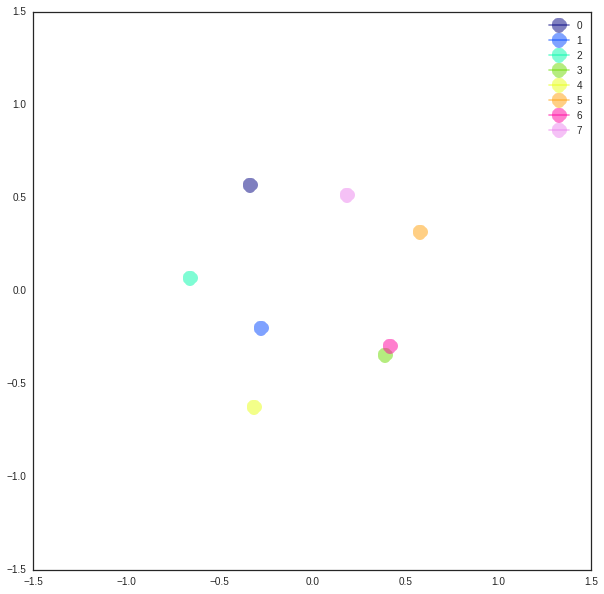

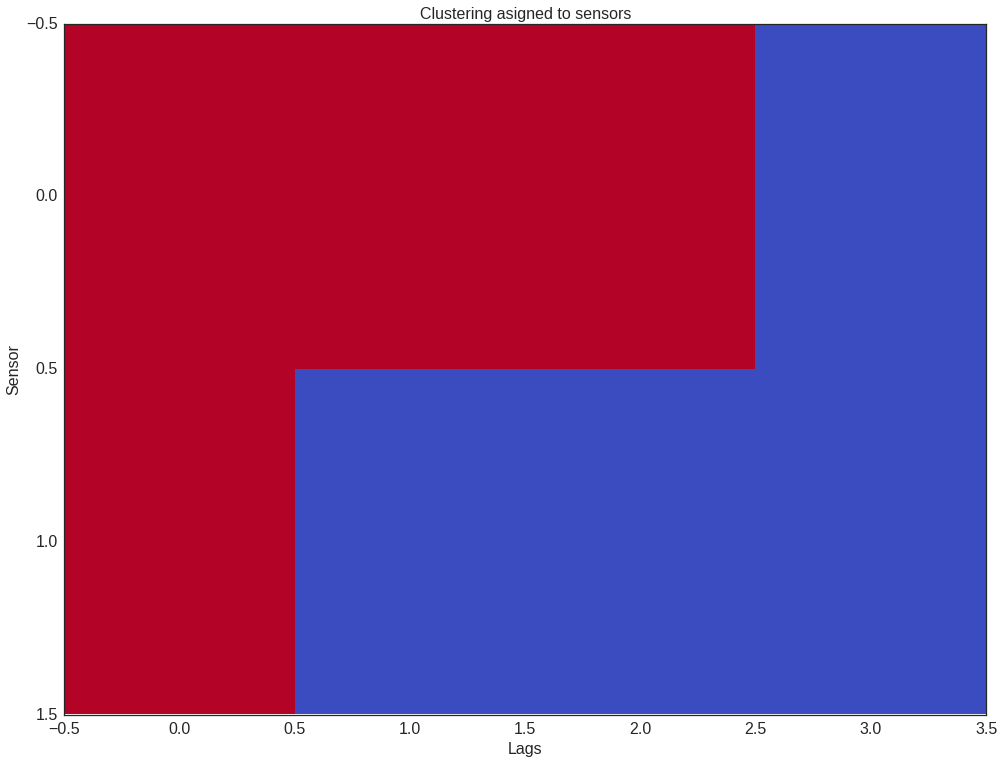

In [77]:
interact(visualize_clustering, mu1=(100, 300), dist=(20, 400), Max=(100, 200),
         base=(20, 40), value=(20, 100), clusters=(2, 10, 1))